In [1]:
import ase
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from alchemical_mace.calculator import get_alchemical_optimized_cellpar
from alchemical_mace.model import AlchemicalPair
from alchemical_mace.utils import suppress_print

plt.style.use("default")

### CeO<sub>2</sub>

In [2]:
# Default settings
model = "medium"
device = "cpu"

# Load structure
atoms = ase.io.read("../data/structures/CeO2.cif")
alch_elements = ["Ce", "Sn"]
alch_idx = [i for i, atom in enumerate(atoms) if atom.symbol in alch_elements]
alch_atomic_numbers = [ase.Atoms(el).numbers[0] for el in alch_elements]
alchemical_pairs = [
    [AlchemicalPair(atom_index=idx, atomic_number=z) for idx in alch_idx]
    for z in alch_atomic_numbers
]

comp_grid = [[1 - x, x] for x in np.linspace(0, 0.5, 21)]
lat_params_CeSn = []
for comp in tqdm(comp_grid):
    with suppress_print(out=True, err=True):
        cellpar = get_alchemical_optimized_cellpar(
            atoms, alchemical_pairs, comp, model=model, device=device
        )
    lat_params_CeSn.append(cellpar[:3])

100%|██████████| 21/21 [01:15<00:00,  3.60s/it]


In [3]:
# Load structure
alch_elements = ["Ce", "Zr"]
alch_idx = [i for i, atom in enumerate(atoms) if atom.symbol in alch_elements]
alch_atomic_numbers = [ase.Atoms(el).numbers[0] for el in alch_elements]
alchemical_pairs = [
    [AlchemicalPair(atom_index=idx, atomic_number=z) for idx in alch_idx]
    for z in alch_atomic_numbers
]

comp_grid = [[1 - x, x] for x in np.linspace(0, 0.5, 21)]
lat_params_CeZr = []
for comp in tqdm(comp_grid):
    with suppress_print(out=True, err=True):
        cellpar = get_alchemical_optimized_cellpar(
            atoms, alchemical_pairs, comp, model=model, device=device
        )
    lat_params_CeZr.append(cellpar[:3])

100%|██████████| 21/21 [01:35<00:00,  4.52s/it]


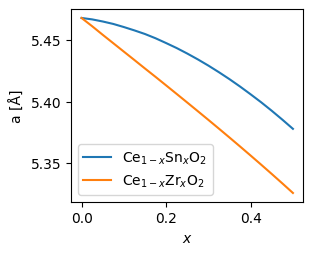

In [4]:
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(
    [x[1] for x in comp_grid],
    [x[0] for x in lat_params_CeSn],
    label="Ce$_{1-x}$Sn$_x$O$_2$",
)
ax.plot(
    [x[1] for x in comp_grid],
    [x[0] for x in lat_params_CeZr],
    label="Ce$_{1-x}$Zr$_x$O$_2$",
)
ax.set_xlabel("$x$")
ax.set_ylabel("a [Å]")
ax.legend()
fig.show()

### BiSBr

In [5]:
# Load structure
atoms = ase.io.read("../data/structures/BiSBr.cif")
halide_elements = ["Cl", "Br", "I"]
halide_idx = [i for i, atom in enumerate(atoms) if atom.symbol in halide_elements]
halide_atomic_numbers = [ase.Atoms(el).numbers[0] for el in halide_elements]
alchemical_pairs = [
    [AlchemicalPair(atom_index=idx, atomic_number=z) for idx in halide_idx]
    for z in halide_atomic_numbers
]

In [6]:
comp_grid = [[1 - x, x, 0] for x in np.linspace(0, 1, 21)]
lat_params_ClBr = []
for comp in tqdm(comp_grid):
    with suppress_print(out=True, err=True):
        cellpar = get_alchemical_optimized_cellpar(
            atoms, alchemical_pairs, comp, model=model, device=device
        )
    lat_params_ClBr.append(cellpar[:3])

comp_grid = [[0, 1 - x, x] for x in np.linspace(0, 1, 21)]
lat_params_BrI = []
for comp in tqdm(comp_grid):
    with suppress_print(out=True, err=True):
        cellpar = get_alchemical_optimized_cellpar(
            atoms, alchemical_pairs, comp, model=model, device=device
        )
    lat_params_BrI.append(cellpar[:3])


comp_grid = [[1 - x, 0, x] for x in np.linspace(0, 1, 21)]
lat_params_ClI = []
for comp in tqdm(comp_grid):
    with suppress_print(out=True, err=True):
        cellpar = get_alchemical_optimized_cellpar(
            atoms, alchemical_pairs, comp, model=model, device=device
        )
    lat_params_ClI.append(cellpar[:3])

100%|██████████| 21/21 [05:35<00:00, 15.95s/it]


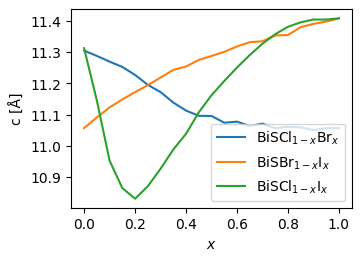

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), layout="constrained")
comp = np.linspace(0, 1, 21)
idx, param = 2, "c"
ax.plot(comp, [lat[idx] for lat in lat_params_ClBr], label="BiSCl$_{1-x}$Br$_x$")
ax.plot(comp, [lat[idx] for lat in lat_params_BrI], label="BiSBr$_{1-x}$I$_x$")
ax.plot(comp, [lat[idx] for lat in lat_params_ClI], label="BiSCl$_{1-x}$I$_x$")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel(f"{param} [Å]")
fig.show()